In [70]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate



file_path = "/Users/raghavsharma/desktop/loan_default_predication_kaggle.csv"

df = pd.read_csv(file_path)

In [34]:
#Names of the columns
print(df.columns)

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')


In [35]:
# Shape of the dataset
print(df.shape)

# First 5 rows
print(df.head(5))



(255347, 18)
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      

In [36]:
# Data types and missing values
print(df.info())

# Summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [37]:
print(df.isnull().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of         LoanID    Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0        False  False   False       False        False           False   
1        False  False   False       False        False           False   
2        False  False   False       False        False           False   
3        False  False   False       False        False           False   
4        False  False   False       False        False           False   
...        ...    ...     ...         ...          ...             ...   
255342   False  False   False       False        False           False   
255343   False  False   False       False        False           False   
255344   False  False   False       False        False           False   
255345   False  False   False       False        False           False   
255346   False  False   False       False        False           False   

        NumCreditLines  InterestRate  LoanTerm  D

In [38]:
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)


LoanID            0.0
Age               0.0
Income            0.0
LoanAmount        0.0
CreditScore       0.0
MonthsEmployed    0.0
NumCreditLines    0.0
InterestRate      0.0
LoanTerm          0.0
DTIRatio          0.0
Education         0.0
EmploymentType    0.0
MaritalStatus     0.0
HasMortgage       0.0
HasDependents     0.0
LoanPurpose       0.0
HasCoSigner       0.0
Default           0.0
dtype: float64


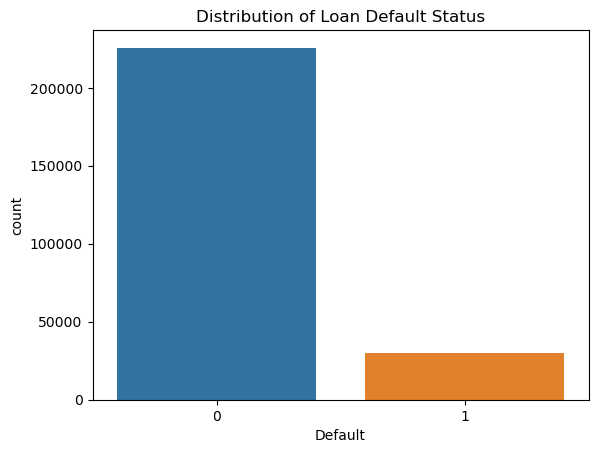

Default
0    225694
1     29653
dtype: int64


In [7]:
#Distribution of the Target Variable (Default)

#Why do we do this? We want to know if most of the loans are "good" loans (not defaulted) or "bad" loans (defaulted). 
# If we have way more loans that didn’t default, the model might get biased towards predicting "no default" because that’s what it’s mostly seeing.

sns.countplot(x='Default', data=df)
plt.title('Distribution of Loan Default Status')
plt.show()

default_grouped = df.groupby('Default').size()

#0 indicates approved
#1 indicated not approved

# Print the result
print(default_grouped)

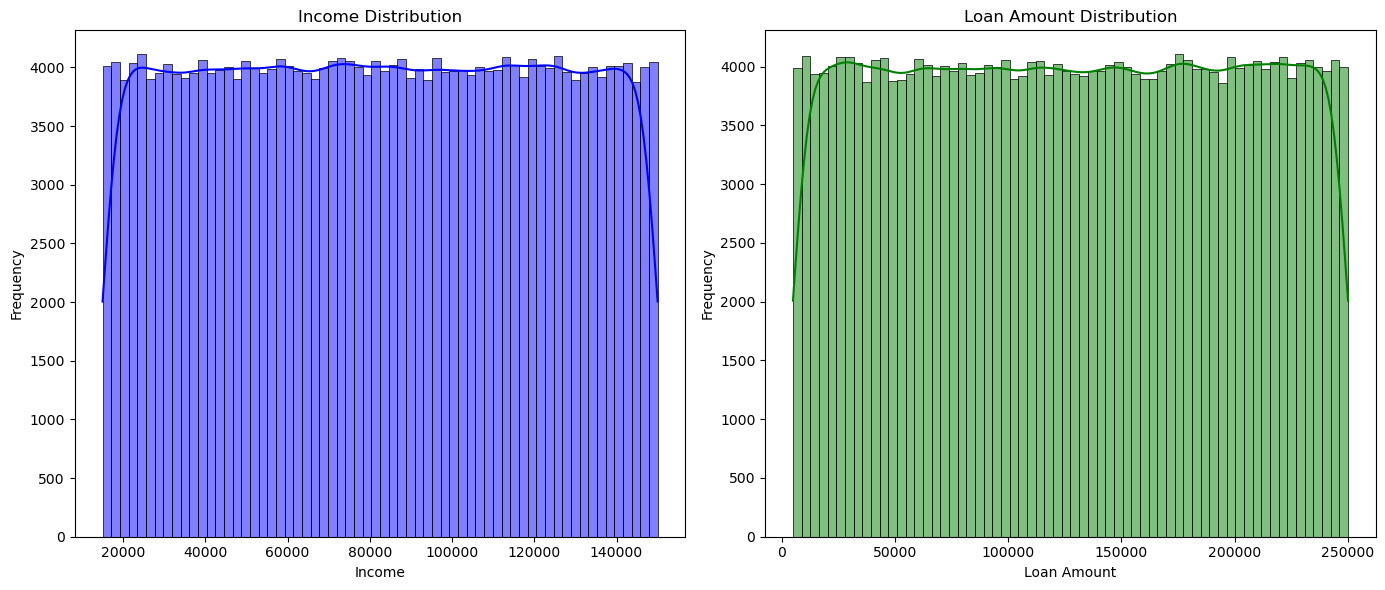

In [12]:
#Univariate Analysis of Continuous Features


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Applicant Income Distribution
sns.histplot(df['Income'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Income Distribution')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Frequency')

# Plot for Loan Amount Distribution
sns.histplot(df['LoanAmount'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Loan Amount Distribution')
axes[1].set_xlabel('Loan Amount')
axes[1].set_ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


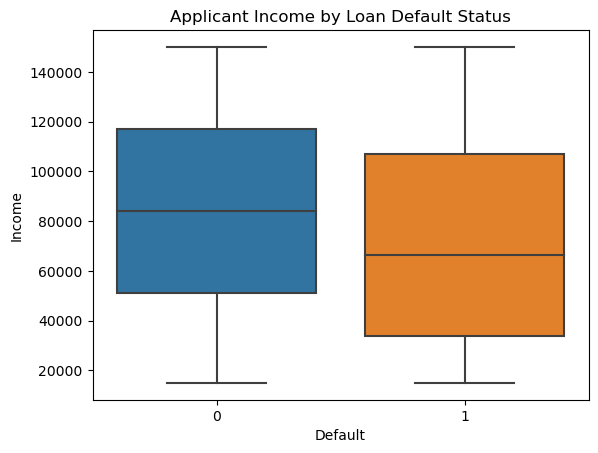

In [14]:
sns.boxplot(x='Default', y='Income', data=df)
plt.title('Applicant Income by Loan Default Status')
plt.show()


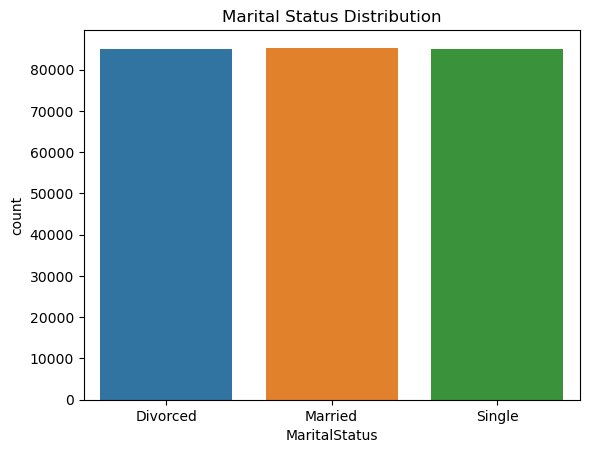

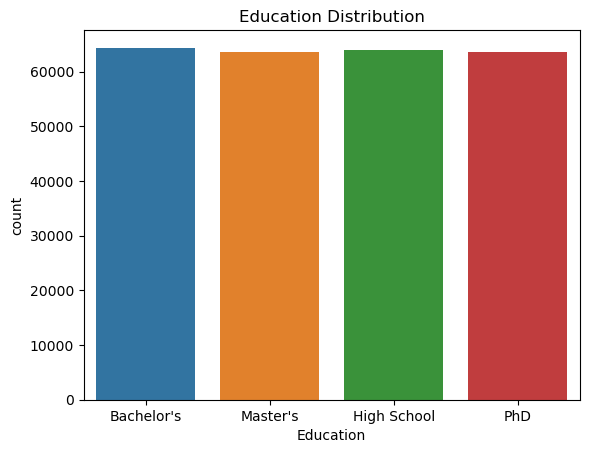

In [15]:
#Analysis of the Categorical Categories

sns.countplot(x='MaritalStatus', data=df)
plt.title('Marital Status Distribution')
plt.show()

sns.countplot(x='Education', data=df)
plt.title('Education Distribution')
plt.show()

/var/folders/vp/lrl181p11fb_10vhrnl_2v300000gn/T/ipykernel_48616/1957515617.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


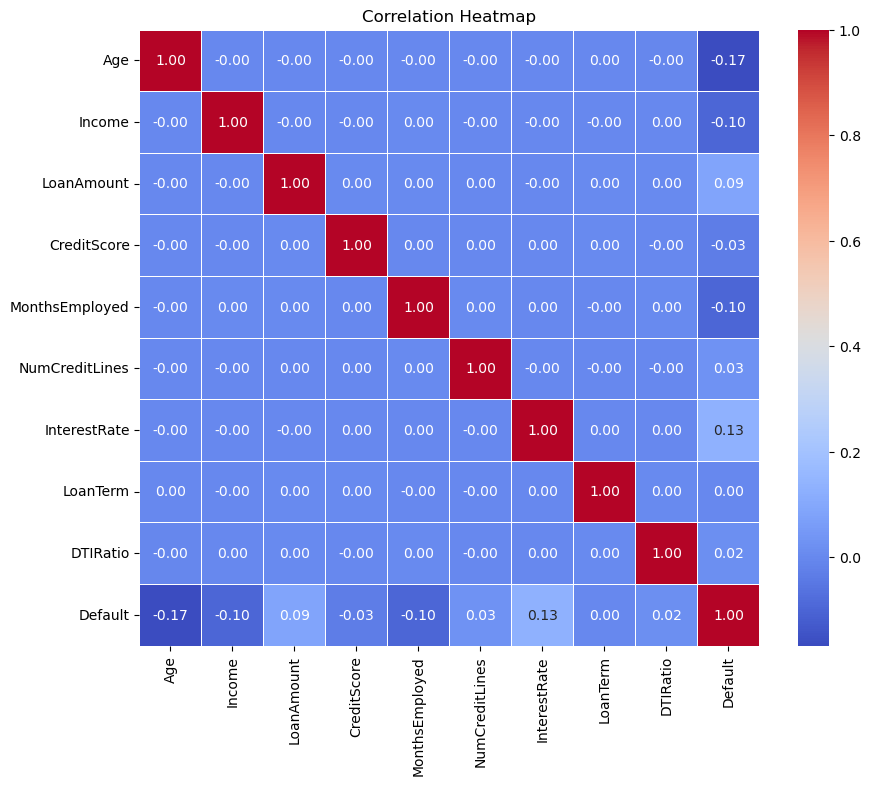

In [17]:
#Correlation between features

corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

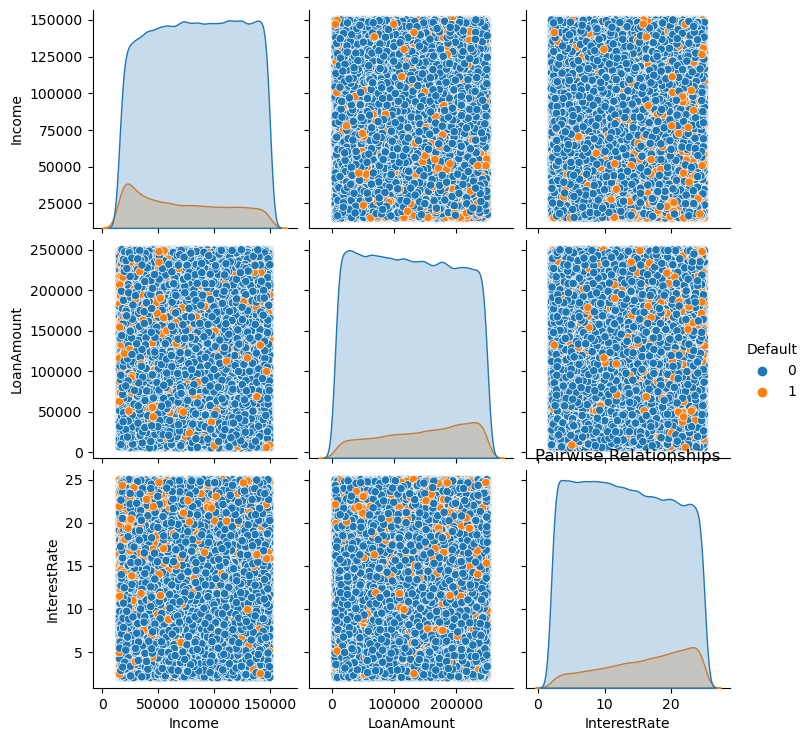

In [19]:
sns.pairplot(df[['Income', 'LoanAmount', 'InterestRate', 'Default']], hue='Default')
plt.title('Pairwise Relationships')
plt.show()

In [39]:
#In the dataset, the column LoanID is a unique identifier for each loan application and does not carry any meaningful information that could help the model 
# predict whether a loan will default or not.

#The correct course of action is to drop the column before the processing of the data.

df.drop(columns=['LoanID'], inplace=True)

print(df.head(5))

   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   InterestRate  LoanTerm  DTIRatio    Education EmploymentType MaritalStatus  \
0         15.23        36      0.44   Bachelor's      Full-time      Divorced   
1          4.81        60      0.68     Master's      Full-time       Married   
2         21.17        24      0.31     Master's     Unemployed      Divorced   
3          7.07        24      0.23  High School      Full-time       Married   
4          6.51        48      0.73   Bachelor's     Unemployed      Divorced   

  HasMortgage HasDependents LoanPurpose HasCoSigner  Default  

In [41]:
#A few of the columns (Education, EmploymentType, MaritalStatus, HasMortgage, HasDependents, LoanPurpose, HasCosigner) have categorical values. 
# Before we proceed, we need to convert them into numerical values.

label_encoder = LabelEncoder()

# Apply Label Encoding to the 'purpose' column since it is the only categorical value column
df['EmploymentType_encoded'] = label_encoder.fit_transform(df['EmploymentType'])
df['MarritalStatus_encoded'] = label_encoder.fit_transform(df['MaritalStatus'])
df['Education_encoded'] = label_encoder.fit_transform(df['Education'])
df['HasMortgage_encoded'] = label_encoder.fit_transform(df['HasMortgage'])
df['HasDependents_encoded'] = label_encoder.fit_transform(df['HasDependents'])
df['LoanPurpose_encoded'] = label_encoder.fit_transform(df['LoanPurpose'])
df['HasCoSigner_encoded'] = label_encoder.fit_transform(df['HasCoSigner'])

print(df.columns)

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner', 'Default', 'EmploymentType_encoded',
       'MarritalStatus_encoded', 'Education_encoded', 'HasMortgage_encoded',
       'HasDependents_encoded', 'LoanPurpose_encoded', 'HasCoSigner_encoded'],
      dtype='object')


In [42]:
print(df.head(4))

   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   

   InterestRate  LoanTerm  DTIRatio    Education  ... LoanPurpose HasCoSigner  \
0         15.23        36      0.44   Bachelor's  ...       Other         Yes   
1          4.81        60      0.68     Master's  ...       Other         Yes   
2         21.17        24      0.31     Master's  ...        Auto          No   
3          7.07        24      0.23  High School  ...    Business          No   

  Default EmploymentType_encoded MarritalStatus_encoded Education_encoded  \
0       0                      0                      0                 0   
1       0                      0                      1         

In [31]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns that are of object dtype
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

for col in categorical_cols:
    # Apply encoding
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])

# Drop original categorical columns after encoding
df.drop(columns=categorical_cols, inplace=True)

# Verify data types again
print(df.dtypes)

LoanID                     object
Age                         int64
Income                      int64
LoanAmount                  int64
CreditScore                 int64
MonthsEmployed              int64
NumCreditLines              int64
InterestRate              float64
LoanTerm                    int64
DTIRatio                  float64
Default                     int64
Education_encoded           int64
EmploymentType_encoded      int64
MaritalStatus_encoded       int64
HasMortgage_encoded         int64
HasDependents_encoded       int64
LoanPurpose_encoded         int64
HasCoSigner_encoded         int64
dtype: object


In [32]:
df = df.apply(pd.to_numeric, errors='coerce')

# Verify data types again
print(df.dtypes)

LoanID                    float64
Age                         int64
Income                      int64
LoanAmount                  int64
CreditScore                 int64
MonthsEmployed              int64
NumCreditLines              int64
InterestRate              float64
LoanTerm                    int64
DTIRatio                  float64
Default                     int64
Education_encoded           int64
EmploymentType_encoded      int64
MaritalStatus_encoded       int64
HasMortgage_encoded         int64
HasDependents_encoded       int64
LoanPurpose_encoded         int64
HasCoSigner_encoded         int64
dtype: object


Processing and modelling the data

In [38]:
X = df.drop('Default', axis=1) #feature variables
y = df['Default'] #Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_train: The features or input data the model learns from during training.
#Y_train: The correct outcomes or labels corresponding to X_train that the model aims to predict.
#X_test: The new, unseen data the model uses to make predictions after training.
#Y_test: The actual correct outcomes for the test data, used to evaluate the model's performance.
#y_pred: The predictions made by the model for the test data, based on what it learned.



We will be utilizing three different algorithms to analyzw this data - XgBoost, RandomForest and neural networks using deep learning.

XG Boost (Extreme Gradient Boosting)

Why it's used:

High Predictive Power: XGBoost is one of the most powerful algorithms for structured/tabular data. It is designed to optimize performance and handles complex relationships well.
Handles Imbalanced Data: Loan default datasets are often imbalanced (e.g., more loans are approved than defaulted). XGBoost uses techniques like weighted loss functions to deal with this.


Feature Importance: It provides insights into which features are most important for predicting defaults, which can help with feature selection and model interpretability.
Handles Missing Data: XGBoost can handle missing values directly without requiring extensive preprocessing.
Fast and Efficient: It's optimized for speed and memory usage, making it suitable for large datasets.


Challenges it addresses:

Non-linear relationships between features and target variables.

High dimensionality of data (e.g., many features like income, loan amount, credit history, etc.).
Imbalanced datasets.


In [43]:
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

In [45]:
# Training the model
xgb_model.fit(X_train, y_train)

# Making predictions
y_pred = xgb_model.predict(X_test)



In [66]:
#Evaluation

# Evaluating the model
accuracy_xgb = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_xgb * 100:.2f}%\n")

classification_report_xgb = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_xgb)

confusion_matrix_xgb = confusion_matrix(y_test, y_pred)
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix_xgb)

Accuracy: 88.59%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45170
           1       0.54      0.09      0.15      5900

    accuracy                           0.89     51070
   macro avg       0.72      0.54      0.54     51070
weighted avg       0.85      0.89      0.85     51070

Confusion Matrix:
[[44737   433]
 [ 5396   504]]


Random Forest


Strengths:

Random forests are an ensemble method that typically performs very well for classification tasks.

It handles overfitting better than individual decision trees, is less sensitive to noise, and works well with both categorical and numerical data.

Very easy to interpret and understand.


Considerations:

Computationally expensive (but less so than deep learning models).

May not capture complex relationships as well as neural networks in some cases.

In [67]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred1 = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_rf * 100:.2f}%\n")

classification_report_rf = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_rf)

confusion_matrix_rf = confusion_matrix(y_test, y_pred)
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix_rf)

Accuracy: 88.59%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45170
           1       0.54      0.09      0.15      5900

    accuracy                           0.89     51070
   macro avg       0.72      0.54      0.54     51070
weighted avg       0.85      0.89      0.85     51070

Confusion Matrix:
[[44737   433]
 [ 5396   504]]


In [62]:
print(max(df['LoanAmount']))



249999


In [71]:
# Create a DataFrame for comparison
comparison_table = pd.DataFrame({
    "Metric": ["Accuracy", "Classification Report", "Confusion Matrix"],
    "Model 1": [accuracy_xgb, classification_report_xgb, confusion_matrix_xgb],
    "Model 2": [accuracy_rf, classification_report_rf, confusion_matrix_rf]
})

# Format the table using tabulate
print(tabulate(comparison_table, headers="keys", tablefmt="pretty"))

+---+-----------------------+-------------------------------------------------------+-------------------------------------------------------+
|   |        Metric         |                        Model 1                        |                        Model 2                        |
+---+-----------------------+-------------------------------------------------------+-------------------------------------------------------+
| 0 |       Accuracy        |                  0.8858625416095555                   |                  0.8858625416095555                   |
| 1 | Classification Report |        precision    recall  f1-score   support        |        precision    recall  f1-score   support        |
|   |                       |                                                       |                                                       |
|   |                       |            0       0.89      0.99      0.94     45170 |            0       0.89      0.99      0.94     45170 |
|   | 